<a href="https://colab.research.google.com/github/andreysoas/Machine-Learning-Implementacoes/blob/main/Regression_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import sqrt
import seaborn as sns
import time
import matplotlib.pyplot as plt
from scipy import optimize
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


#Regression ( polynomial )

In [ ]:
class regression:

  def __init__(self,X,y,grade=1):

    if X.shape[0] != y.shape[0]:
      raise Exception('different dimensions between X and y!')

    self.X = X #Features
    self.y = y #Targets
    self.grade = grade #grade of regression
    self.theta_params = None


  def matrix_grade(self,X,grade):

    if self.grade > 1: 

      matrix_join = np.ones([X.shape[0],self.grade-1])

      for pot in range(0,self.grade-1):
        matrix_join[:,pot] = X[:,1]**(pot+2)

      X = np.concatenate((X,matrix_join),axis=1)

    return X


  def train_model(self,regularized=False,lambda_=None): #X = matrix mxn , y = mx1

    theta_0 = None
    m,n = self.X.shape

    self.X = np.concatenate((np.ones((m,1)),self.X),axis=1)
    self.X = self.matrix_grade(self.X,self.grade)
    
    cost_function = lambda theta_parameters: sum(((self.X@theta_parameters - self.y)**2))/(2*m)
    
    if regularized:

      matrix_lambda = np.eye(self.grade+1)
      matrix_lambda[0,0] = 0

      self.theta_params = np.linalg.inv((self.X.T@self.X) + (lambda_*matrix_lambda))@self.X.T@self.y

    else:
      
      self.theta_params = np.linalg.inv(self.X.T@self.X)@self.X.T@self.y

    #No error ocurred

    return False

  
  def hypothesis(self,x):

    x = np.concatenate((np.ones((1,1)),x),axis=1)
    
    x = self.matrix_grade(x,self.grade)

    return (x@self.theta_params)[0]



#Funções auxiliares

In [ ]:
def plotPoints(data,predicts=None,predictsX=None,title=None,rangeToPlot=None,
               invertAxis=None,labels=('x','y'),grid=False,sizePlot=[6,6],save=False): #dados em matriz nx2, range para plotar, inverter algum eixo

  plt.rcParams['figure.figsize'] = sizePlot

  #graphic,plot = plt.subplots(1,1)

  plt.scatter(data[:,0],data[:,1],color='red',marker='x',label='Targets')

  if type(predicts) != type(None):
    if type(predictsX) == type(None):
      if predicts.shape != data[:,0].shape: raise Exception('Dimensões diferem!')
      plt.plot(data[:,0],predicts,color='dodgerblue',label='Curva de ajuste')
    else:
      if predicts.shape != predictsX.shape: raise Exception('Dimensões diferem!')
      plt.plot(predictsX,predicts,color='dodgerblue',label='Curva de ajuste')


  if rangeToPlot != None: #não recebeu o parâmetro
    plt.xlim(rangeToPlot[0])
    plt.ylim(rangeToPlot[1])

  if invertAxis != None:
    if invertAxis[1]:
      plt.gca().invert_yaxis()
    if invertAxis[0]:
      plt.gca().invert_xaxis()
  
  if title != None: plt.title(title)

  plt.xlabel(labels[0])
  plt.ylabel(labels[1])
  plt.legend(loc='upper left')

  if grid: plt.grid()

  if save: plt.savefig(fname=title,format='svg')

  plt.show()

In [ ]:
residual_variance = lambda y,predicts,n,grade: sum((y-predicts)**2)/(n-(grade-1))

#Problema prático sobre tensões e correntes

coefficients:[-89.35744087 944.47454688]
$R2: 0.9905484273926535
MSE: 34.57784264853283
SE: 6.441537951315617


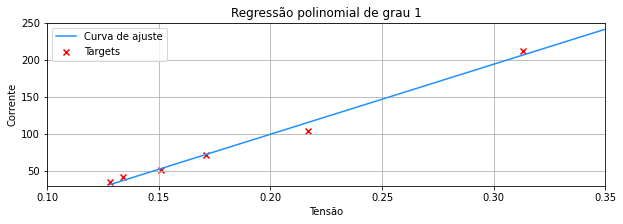



coefficients:[ -17.49020789  213.01004313 1657.65666816]
$R2: 0.9983560627974568
MSE: 6.061096027744085
SE: 2.6969084584562566


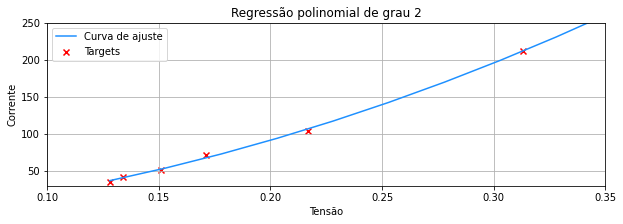



coefficients:[ -154.563801    2350.47355807 -8862.8501178  16276.96664982]
$R2: 0.9991175937379071
MSE: 3.255853340560947
SE: 1.9766193383332908


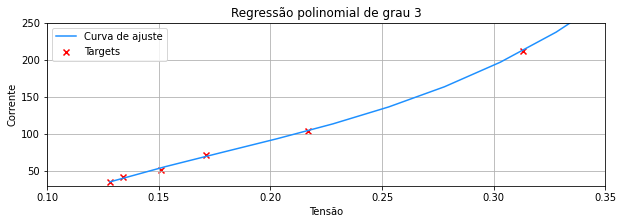

In [ ]:
dados= np.array([[0.128, 35],
                  [0.134, 42],
                  [0.151, 51],
                  [0.171, 72],
                  [0.217, 104],
                  [0.313, 212]])
X = dados[:,0]
y = dados[:,1]


for i in range(1,4):
  model = regression(X.reshape(-1,1),y,i)
  model.train_model()
  print(f'coefficients:{model.theta_params}')

  predicts = np.array([model.hypothesis(np.array([[i]])) for i in X])

  print(f"$R2: {r2_score(predicts,y)}")
  print(f"MSE: {mean_squared_error(predicts,y)}")
  print(f"SE: {sqrt(sum((predicts-y)**2)/(y.shape[0]-1))}")

  p = np.arange(X.min(),X.max()+1,step=0.025)

  predicts = np.array([model.hypothesis(np.array([[i]])) for i in p])
  
  plotPoints(dados,predicts,p,title=f'Regressão polinomial de grau {i}',
            rangeToPlot=([0.1,0.35],[30,250]),invertAxis=(False,False),
            labels=('Tensão','Corrente'),grid=True,sizePlot=[10,3],save=False)
  
  print('\n')

In [ ]:
model.hypothesis(np.array([[0.142]]))

47.098577760450034

Problema do Carneiro hidráulico

coefficients:[-0.71607857  0.65090317 -0.0948381   0.00417778]
$R2: 0.9860871728384601
MSE: 4.914306122448933e-05


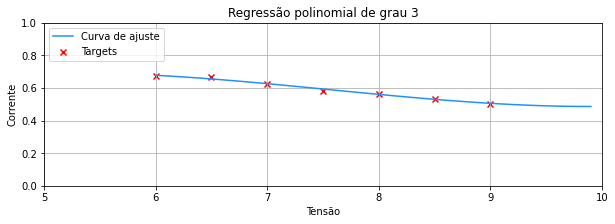

In [ ]:
dados= np.array([[6, 0.6728],
                [6.5, 0.6676],
                [7, 0.6214],
                [7.5, 0.5840],
                [8, 0.5653],
                [8.5, 0.5350],
                [9, 0.5029]])
X = dados[:,0]
y = dados[:,1]

k = 3
model = regression(X.reshape(-1,1),y,k)
model.train_model()

print(f'coefficients:{model.theta_params}')

predicts = np.array([model.hypothesis(np.array([[i]])) for i in X])
residuals = y-predicts

print(f"$R2: {r2_score(predicts,y)}")
print(f"MSE: {mean_squared_error(predicts,y)}")
#print(f"SE: {sqrt(sum((predicts-y)**2)/y.shape[0]-1)}")

p = np.arange(X.min(),X.max()+1,step=0.1)

predicts = np.array([model.hypothesis(np.array([[i]])) for i in p])

plotPoints(dados,predicts,p,title=f'Regressão polinomial de grau {k}',
          rangeToPlot=([5,10],[0,1]),invertAxis=(False,False),
          labels=('Tensão','Corrente'),grid=True,sizePlot=[10,3],save=False)

print('\n')

#Problema Cars

In [ ]:
sns.set_style('whitegrid')
data = pd.read_csv('cars.csv')
data.head()

,Unnamed: 0,speed,dist
0,1,4,2
1,2,4,10
2,3,7,4
3,4,7,22
4,5,8,16


In [ ]:
data = data.drop('Unnamed: 0',axis=1)
data.columns

Index(['speed', 'dist'], dtype='object')

In [ ]:
data.head(n=2)

,speed,dist
0,4,2
1,4,10


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


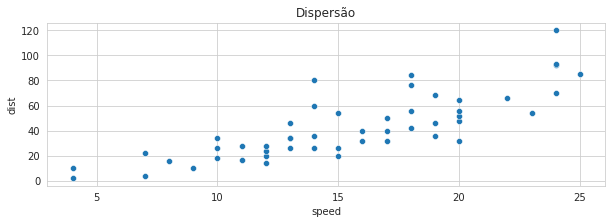

In [ ]:
sns.scatterplot(data.speed,data.dist).set_title('Dispersão')
plt.savefig(fname='DispersaoIni',format='svg')

Breve análise sobre a distribuição destes dados

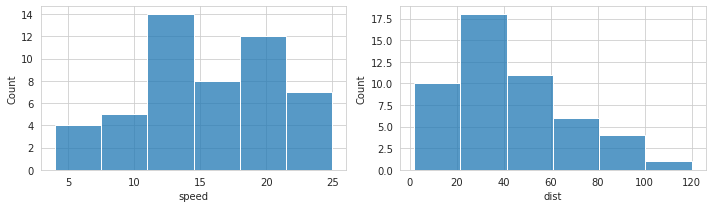

In [ ]:
plt.subplots()
plt.subplot(1,2,1)
sns.histplot(data.speed,bins = 6)
plt.subplot(1,2,2)
sns.histplot(data.dist,bins = 6)
plt.tight_layout()
plt.savefig(fname='hists',format='svg')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


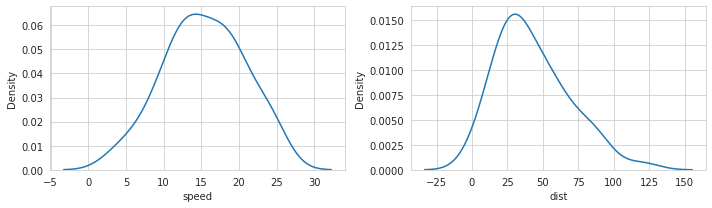

In [ ]:
plt.subplots()
plt.subplot(1,2,1)
sns.distplot(data.speed,hist=False)
plt.subplot(1,2,2)
sns.distplot(data.dist,hist=False)
plt.tight_layout()
plt.savefig(fname='curvasDistribuicao',format='svg')

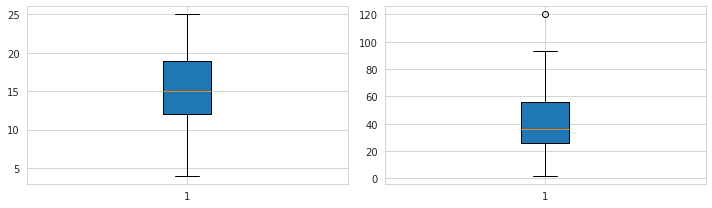

In [ ]:
plt.subplots()
plt.subplot(1,2,1)
plt.boxplot(data.speed,patch_artist=True,vert=True,showfliers=True)
plt.subplot(1,2,2)
plt.boxplot(data.dist,patch_artist=True,vert=True,showfliers=True)
plt.tight_layout()
plt.savefig(fname='boxplot',format='svg')

Como vemos, há a ocorrência de outliers ou valores muito discrepantes em dist

In [ ]:
linear_corr = np.corrcoef(data.speed,data.dist)
print(linear_corr)

[[1.        0.8068949]
 [0.8068949 1.       ]]


coefficients:[-17.57909489   3.93240876]
R2: 0.6510793807582509
MSE: 227.07042102189783
->Tempo: 0.004168033599853516


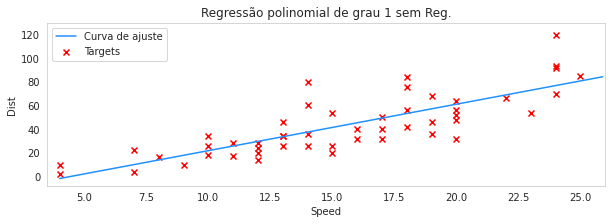

|Predição para Speed = 27.5mph| dist = 90.56214598540139


coefficients:[2.47013779 0.91328761 0.0999593 ]
R2: 0.6673308165262095
MSE: 216.49431815339997
->Tempo: 0.007712602615356445


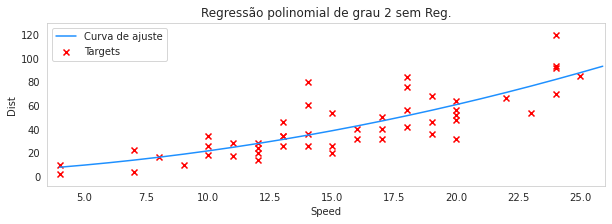

|Predição para Speed = 27.5mph| dist = 103.17976936705787


coefficients:[-1.95050491e+01  6.80110597e+00 -3.49657814e-01  1.02520479e-02]
R2: 0.673180846338455
MSE: 212.6872380921988
->Tempo: 0.0002033710479736328


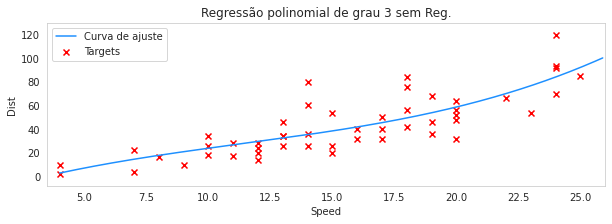

|Predição para Speed = 27.5mph| dist = 116.30720173722659


coefficients:[ 4.58454116e+01 -1.89622437e+01  2.89218983e+00 -1.51951458e-01
  2.79897764e-03]
R2: 0.683523703088069
MSE: 205.9563179138277
->Tempo: 0.00020265579223632812


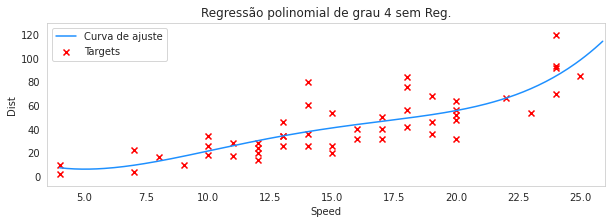

|Predição para Speed = 27.5mph| dist = 152.2614750190519


coefficients:[-2.65005270e+00  5.48425933e+00 -1.42612254e+00  1.94048869e-01
 -1.00395167e-02  1.78973471e-04]
R2: 0.6845866370161117
MSE: 205.2645821973097
->Tempo: 0.000209808349609375


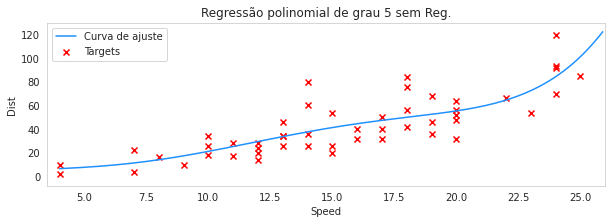

|Predição para Speed = 27.5mph| dist = 178.3609389760736


coefficients:[-2.60100068e+02  1.57975264e+02 -3.51658921e+01  3.84932616e+00
 -2.17902206e-01  6.13244222e-03 -6.77043521e-05]
R2: 0.6887774499832573
MSE: 202.53728661087578
->Tempo: 0.0002472400665283203


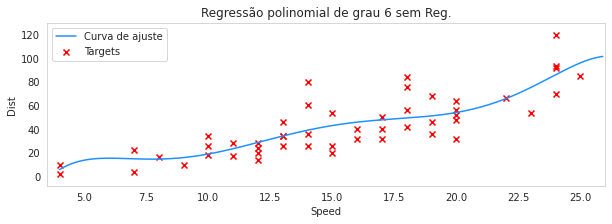

|Predição para Speed = 27.5mph| dist = 88.64631891295721


coefficients:[ 6.71832647e+02 -4.70533545e+02  1.30975480e+02 -1.88337097e+01
  1.52997923e+00 -7.05630831e-02  1.71920031e-03 -1.71510955e-05]
R2: 0.6943807357656311
MSE: 198.8907825307369
->Tempo: 0.001979351043701172


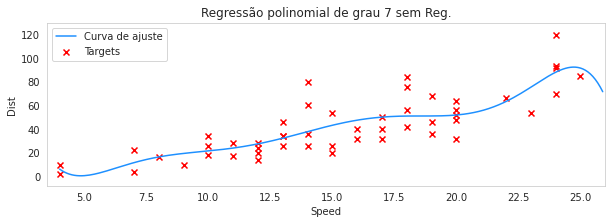

|Predição para Speed = 27.5mph| dist = -98.06060721600079




In [ ]:
R2 = []
MSEs = []
dists = []
times = []

dados = data.iloc[:,-2:].values

X = dados[:,0]
y = dados[:,1]

for k in range (1,8):
  model = regression(X.reshape(-1,1),y,k)

  inicio = time.time()
  model.train_model()
  fim = time.time()

  print(f'coefficients:{model.theta_params}')

  predicts = np.array([model.hypothesis(np.array([[i]])) for i in X])
  residuals = y-predicts

  r2 = r2_score(y,predicts)
  mse = mean_squared_error(y,predicts)

  print(f"R2: {r2}")
  print(f"MSE: {mse}")
  print(f'->Tempo: {fim-inicio}')
  #print(f"SE: {sqrt(sum((predicts-y)**2)/y.shape[0]-1)}")
  R2.append(r2)
  MSEs.append(mse)
  times.append(fim-inicio)

  p = np.arange(X.min(),X.max()+1,step=0.1)

  predicts = np.array([model.hypothesis(np.array([[i]])) for i in p])

  plotPoints(dados,predicts,p,title=f'Regressão polinomial de grau {k} sem Reg.',
            rangeToPlot=([X.min()-0.5,X.max()+1],[y.min()-10,y.max()+10]),invertAxis=(False,False),
            labels=('Speed','Dist'),grid=True,sizePlot=[10,3],save=True)

  dists_calc = model.hypothesis(np.array([[27.5]]))
  dists.append(dists_calc)
  print(f'|Predição para Speed = 27.5mph| dist = {dists_calc}')

  print('\n')

In [ ]:
df_metrics = pd.DataFrame({'grau':np.arange(1,8),'R2':R2,'MSE':MSEs,'Tempo':times,'Dist p/ 27.5mph':dists})
df_metrics

,grau,R2,MSE,Tempo,Dist p/ 27.5mph
0,1,0.651079,227.070421,0.002537,90.562146
1,2,0.667331,216.494318,0.007274,103.179769
2,3,0.673181,212.687238,0.004253,116.307202
3,4,0.683524,205.956318,0.002017,152.261475
4,5,0.684587,205.264582,0.003606,178.360939
5,6,0.688777,202.537287,0.004819,88.646319
6,7,0.694381,198.890783,0.004291,-98.060607


In [ ]:
print(df_metrics.to_latex())

\begin{tabular}{lrrrrr}
\toprule
{} &  grau &        R2 &         MSE &     Tempo &  Dist p/ 27.5mph \\
\midrule
0 &     1 &  0.651079 &  227.070421 &  0.002537 &        90.562146 \\
1 &     2 &  0.667331 &  216.494318 &  0.007274 &       103.179769 \\
2 &     3 &  0.673181 &  212.687238 &  0.004253 &       116.307202 \\
3 &     4 &  0.683524 &  205.956318 &  0.002017 &       152.261475 \\
4 &     5 &  0.684587 &  205.264582 &  0.003606 &       178.360939 \\
5 &     6 &  0.688777 &  202.537287 &  0.004819 &        88.646319 \\
6 &     7 &  0.694381 &  198.890783 &  0.004291 &       -98.060607 \\
\bottomrule
\end{tabular}



Tentativa de usar Regularização para ajustar o modelo de grau 4

coefficients:[-2.71803429e+00 -7.54830380e-01  6.86974729e-01 -4.48948497e-02
  9.95791627e-04]
$R2: 0.6788329463827444
MSE: 209.00896668621618


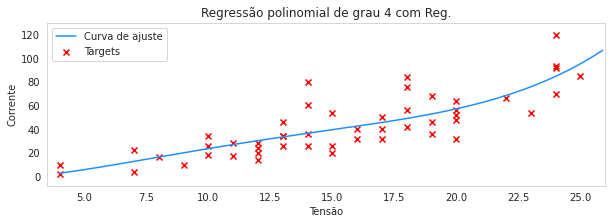

In [ ]:
k = 4
model = regression(X.reshape(-1,1),y,k)

inicio = time.time()
model.train_model(regularized=True,lambda_=10)
fim = time.time()

print(f'coefficients:{model.theta_params}')

predicts = np.array([model.hypothesis(np.array([[i]])) for i in X])

print(f"$R2: {r2_score(y,predicts)}")
print(f"MSE: {mean_squared_error(y,predicts)}")
#print(f"SE: {sqrt(sum((predicts-y)**2)/y.shape[0]-1)}")

p = np.arange(X.min(),X.max()+1,step=0.1)

predicts = np.array([model.hypothesis(np.array([[i]])) for i in p])

plotPoints(dados,predicts,p,title=f'Regressão polinomial de grau {k} com Reg.',
          rangeToPlot=([X.min()-0.5,X.max()+1],[y.min()-10,y.max()+10]),invertAxis=(False,False),
          labels=('Tensão','Corrente'),grid=True,sizePlot=[10,3],save=True)



In [ ]:
  dists_calc = model.hypothesis(np.array([[27.5]]))
  print(f'|Predição para Speed = 27.5mph| dist = {dists_calc}')

|Predição para Speed = 27.5mph| dist = 182.4187757257464


coefficients:[ 1.80731342e+00  3.57254072e-01  1.38145167e+00 -4.92407724e-01
  7.21180978e-02 -4.88183931e-03  1.54264057e-04 -1.84203073e-06]
$R2: 0.6882536708065321
MSE: 202.87815141399335


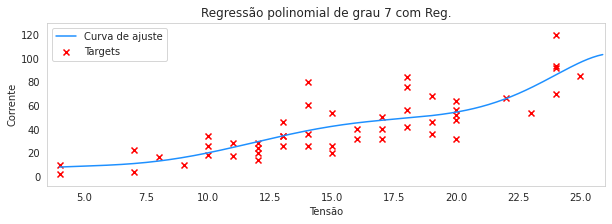

In [ ]:
k = 7
model = regression(X.reshape(-1,1),y,k)

inicio = time.time()
model.train_model(regularized=True,lambda_=10)
fim = time.time()

print(f'coefficients:{model.theta_params}')

predicts = np.array([model.hypothesis(np.array([[i]])) for i in X])

print(f"$R2: {r2_score(y,predicts)}")
print(f"MSE: {mean_squared_error(y,predicts)}")
#print(f"SE: {sqrt(sum((predicts-y)**2)/y.shape[0]-1)}")

p = np.arange(X.min(),X.max()+1,step=0.1)

predicts = np.array([model.hypothesis(np.array([[i]])) for i in p])

plotPoints(dados,predicts,p,title=f'Regressão polinomial de grau {k} com Reg.',
          rangeToPlot=([X.min()-0.5,X.max()+1],[y.min()-10,y.max()+10]),invertAxis=(False,False),
          labels=('Tensão','Corrente'),grid=True,sizePlot=[10,3],save=True)



In [ ]:
dists_calc = model.hypothesis(np.array([[27.5]]))
print(f'|Predição para Speed = 27.5mph| dist = {dists_calc}')

|Predição para Speed = 27.5mph| dist = 92.96055478583003


#Testando a criação de modelos com o Outlier tratado

In [ ]:
from statistics import median

Q3 = data['dist'].quantile(0.75)
Q1 = data['dist'].quantile(0.25)

data.loc[data['dist'] > Q3 + (1.5*(Q3-Q1)),'dist'] = median(data.dist)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


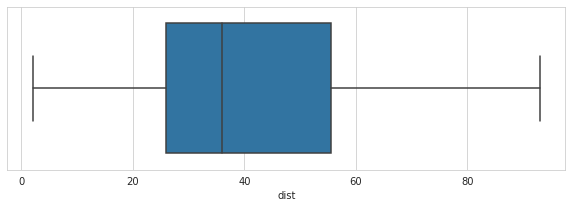

In [ ]:
sns.boxplot(data.dist)

In [ ]:
linear_corr = np.corrcoef(data.speed,data.dist)
print(linear_corr)

[[1.         0.77401547]
 [0.77401547 1.        ]]


coefficients:[-11.13868613   3.40510949]
R2: 0.5990999553611556
MSE: 212.5932846715328
->Tempo: 0.0002574920654296875


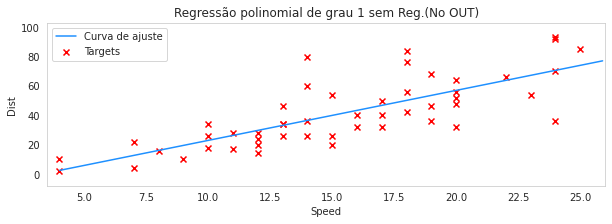

|Predição para Speed = 27.5mph| dist = 82.50182481751817


coefficients:[-7.54491299  2.86393983  0.01791745]
R2: 0.5997407487687983
MSE: 212.2534783353939
->Tempo: 0.005007743835449219


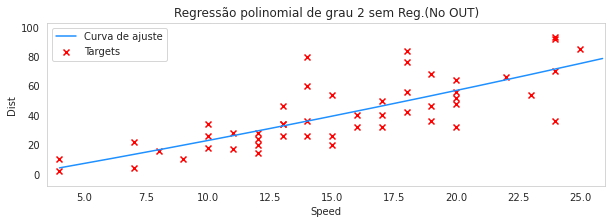

|Predição para Speed = 27.5mph| dist = 84.76350120196858


coefficients:[-9.37589652e+00  3.35451579e+00 -1.95448758e-02  8.54205743e-04]
R2: 0.5997905892579134
MSE: 212.2270484224211
->Tempo: 0.01103973388671875


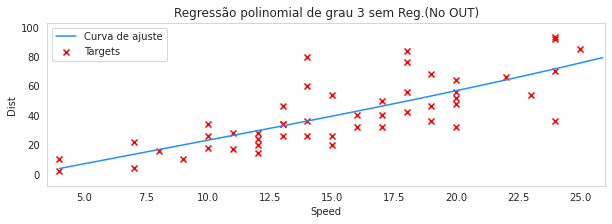

|Predição para Speed = 27.5mph| dist = 85.85728541602974


coefficients:[ 4.51006171e+01 -1.81219582e+01  2.68287765e+00 -1.34359554e-01
  2.33324359e-03]
R2: 0.6086108679455886
MSE: 207.5497428371338
->Tempo: 0.011785507202148438


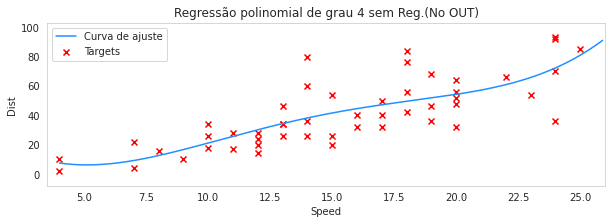

|Predição para Speed = 27.5mph| dist = 115.82897095553085


coefficients:[-5.34091239e+01  3.15366793e+01 -6.08899080e+00  5.68477363e-01
 -2.37458294e-02  3.63552149e-04]
R2: 0.6139933535136186
MSE: 204.69546456526322
->Tempo: 0.001184225082397461


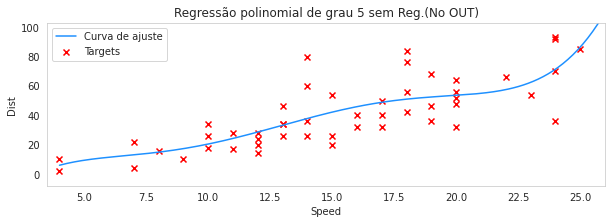

|Predição para Speed = 27.5mph| dist = 168.84529903278417


coefficients:[-4.78515099e+01  2.82448393e+01 -5.36064697e+00  4.89570525e-01
 -1.92586767e-02  2.35034026e-04  1.46154060e-06]
R2: 0.6139957501794802
MSE: 204.69419363732345
->Tempo: 0.004877567291259766


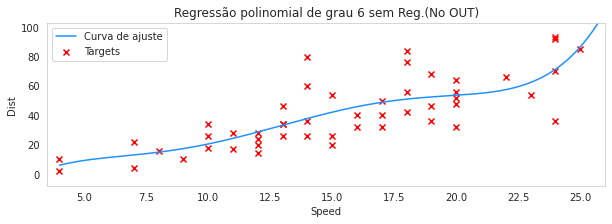

|Predição para Speed = 27.5mph| dist = 170.78198046002206


coefficients:[-3.20115944e+01  1.75621757e+01 -2.53676283e+00  1.04029495e-01
  1.04498748e-02 -1.06855152e-03  3.18333645e-05 -2.91515301e-07]
R2: 0.6139977367287528
MSE: 204.69314019010966
->Tempo: 0.0067980289459228516


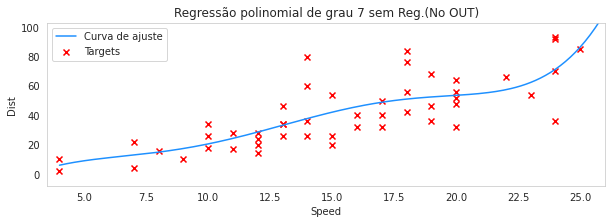

|Predição para Speed = 27.5mph| dist = 167.60842258990806




In [ ]:
R2 = []
MSEs = []
dists = []
times = []

dados = data.iloc[:,-2:].values

X = dados[:,0]
y = dados[:,1]

for k in range (1,8):
  model = regression(X.reshape(-1,1),y,k)

  inicio = time.time()
  model.train_model()
  fim = time.time()

  print(f'coefficients:{model.theta_params}')

  predicts = np.array([model.hypothesis(np.array([[i]])) for i in X])
  residuals = y-predicts

  r2 = r2_score(y,predicts)
  mse = mean_squared_error(y,predicts)

  print(f"R2: {r2}")
  print(f"MSE: {mse}")
  print(f'->Tempo: {fim-inicio}')
  #print(f"SE: {sqrt(sum((predicts-y)**2)/y.shape[0]-1)}")
  R2.append(r2)
  MSEs.append(mse)
  times.append(fim-inicio)

  p = np.arange(X.min(),X.max()+1,step=0.1)

  predicts = np.array([model.hypothesis(np.array([[i]])) for i in p])

  plotPoints(dados,predicts,p,title=f'Regressão polinomial de grau {k} sem Reg.(No OUT)',
            rangeToPlot=([X.min()-0.5,X.max()+1],[y.min()-10,y.max()+10]),invertAxis=(False,False),
            labels=('Speed','Dist'),grid=True,sizePlot=[10,3],save=True)

  dists_calc = model.hypothesis(np.array([[27.5]]))
  dists.append(dists_calc)
  print(f'|Predição para Speed = 27.5mph| dist = {dists_calc}')

  print('\n')

In [ ]:
df_metrics2 = pd.DataFrame({'grau':np.arange(1,8),'R2':R2,'MSE':MSEs,'Tempo':times,'Dist p/ 27.5mph':dists})
df_metrics2

,grau,R2,MSE,Tempo,Dist p/ 27.5mph
0,1,0.599100,212.593285,0.000257,82.501825
1,2,0.599741,212.253478,0.005008,84.763501
2,3,0.599791,212.227048,0.011040,85.857285
3,4,0.608611,207.549743,0.011786,115.828971
4,5,0.613993,204.695465,0.001184,168.845299
5,6,0.613996,204.694194,0.004878,170.781980
6,7,0.613998,204.693140,0.006798,167.608423


In [ ]:
print(df_metrics2.to_latex())

\begin{tabular}{lrrrrr}
\toprule
{} &  grau &        R2 &         MSE &     Tempo &  Dist p/ 27.5mph \\
\midrule
0 &     1 &  0.599100 &  212.593285 &  0.000257 &        82.501825 \\
1 &     2 &  0.599741 &  212.253478 &  0.005008 &        84.763501 \\
2 &     3 &  0.599791 &  212.227048 &  0.011040 &        85.857285 \\
3 &     4 &  0.608611 &  207.549743 &  0.011786 &       115.828971 \\
4 &     5 &  0.613993 &  204.695465 &  0.001184 &       168.845299 \\
5 &     6 &  0.613996 &  204.694194 &  0.004878 &       170.781980 \\
6 &     7 &  0.613998 &  204.693140 &  0.006798 &       167.608423 \\
\bottomrule
\end{tabular}



O modelo que aparenta ter capturado melhor a tendência dos dados é o modelo do polinômio de grau 4, podendo ser feita uma análise com relação ao uso ou não da regularização.

coefficients:[-2.71889422e+00  3.58672944e-01  1.30454426e+00 -3.28520150e-01
  3.72985761e-02 -1.99128889e-03  4.80363743e-05 -4.01902277e-07]
$R2: 0.6139594115551201
MSE: 204.71346364643537


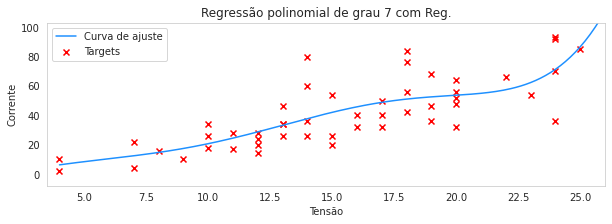

|Predição para Speed = 27.5mph| dist = 170.80259103934804


In [ ]:
k = 7
model = regression(X.reshape(-1,1),y,k)

inicio = time.time()
model.train_model(regularized=True,lambda_=1)
fim = time.time()

print(f'coefficients:{model.theta_params}')

predicts = np.array([model.hypothesis(np.array([[i]])) for i in X])

print(f"$R2: {r2_score(y,predicts)}")
print(f"MSE: {mean_squared_error(y,predicts)}")
#print(f"SE: {sqrt(sum((predicts-y)**2)/y.shape[0]-1)}")

p = np.arange(X.min(),X.max()+1,step=0.1)

predicts = np.array([model.hypothesis(np.array([[i]])) for i in p])

plotPoints(dados,predicts,p,title=f'Regressão polinomial de grau {k} com Reg.',
          rangeToPlot=([X.min()-0.5,X.max()+1],[y.min()-10,y.max()+10]),invertAxis=(False,False),
          labels=('Tensão','Corrente'),grid=True,sizePlot=[10,3],save=True)

dists_calc = model.hypothesis(np.array([[27.5]]))
dists.append(dists_calc)
print(f'|Predição para Speed = 27.5mph| dist = {dists_calc}')